In [3]:
import pandas as pd
import numpy as np
from natasha import MorphVocab, Doc, Segmenter, NamesExtractor
import gensim
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel, coherencemodel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [63]:
# !pip install natasha pyLDAvis

In [5]:
df = pd.read_csv('.tmp/del_freq_words.csv')
df.text.head()

0    производство бриллиант стать дешёвый либо созд...
1    радиоприёмник создать поле сражение первый мир...
2    исследование российский учёный подтвердить сущ...
3    создатель точнее описывать ритча именно слово ...
4    поиск лекарство болезнь альцгеймер становиться...
Name: text, dtype: object

In [6]:
tokenized_text = []

for i in df.text:
    tokenized_text.append(i.split())

tokenized_text[0][:10], len(tokenized_text)

(['производство',
  'бриллиант',
  'стать',
  'дешёвый',
  'либо',
  'создавать',
  'странный',
  'проблема',
  'слишком',
  'бриллиант'],
 4337)

In [7]:
bigram = Phrases(tokenized_text, min_count=10)

In [8]:
docs = [bigram[i] for i in tokenized_text]

for i in docs:
    tmp = [j for j in i if '_' in j]

    if len(tmp) > 10:
        break

tmp

['электронный_коммерция',
 'обращать_внимание',
 'несколько_десятилетие',
 'продолжать_развиваться',
 'co_ltd',
 'вырастить_лаборатория',
 'вырастить_лаборатория',
 'опубликовать_журнал',
 'лабораторный_условие',
 'general_electric',
 'вырастить_лаборатория',
 'высокий_давление',
 'высокий_температура',
 'co_ltd',
 'технология_изготовление',
 'продвинуться_вперёд',
 'вырастить_лаборатория',
 'химический_осаждение',
 'паровой_фаза',
 'стоить_дорогой',
 'co_ltd',
 'самый_простой',
 'важно_отметить',
 'надёжный_источник',
 'температура_давление',
 'потенциально_опасный',
 'высокий_давление',
 'пригодный_использование',
 'драгоценный_камень',
 'значительный_количество',
 'выходить_далеко',
 'дать_статья',
 'короче_говорить',
 'мера_безопасность',
 'разработать_алгоритм',
 'повышение_эффективность',
 'tcp_ip',
 'текущий_состояние',
 'научно_исследовательский',
 'намного_превышать',
 'ювелирный_изделие',
 'горный_порода',
 'противный_случай',
 'переработка_отход',
 'пищевой_продукт',
 'слишк

In [9]:
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.3)

In [10]:
id2token = {value: key for key, value in dictionary.token2id.items()}
id2token

{0: 'apple',
 1: 'co_ltd',
 2: 'de',
 3: 'element',
 4: 'general_electric',
 5: 'in',
 6: 'iphone',
 7: 'john',
 8: 'news',
 9: 'press',
 10: 'works',
 11: 'абсолютно',
 12: 'автоматизация',
 13: 'автоматизировать',
 14: 'алмаз',
 15: 'алмазный',
 16: 'аспирант',
 17: 'безопасно',
 18: 'бережно',
 19: 'больший_часть',
 20: 'бриллиант',
 21: 'важно_отметить',
 22: 'великое',
 23: 'вес',
 24: 'включая',
 25: 'включить',
 26: 'водород',
 27: 'вокруг',
 28: 'впечатляющий',
 29: 'выпустить',
 30: 'вырастить_лаборатория',
 31: 'высокий_давление',
 32: 'высокий_температура',
 33: 'высококачественный',
 34: 'высокотехнологичный',
 35: 'выставить',
 36: 'выходить_далеко',
 37: 'гарвард',
 38: 'генерировать',
 39: 'гигантский',
 40: 'горный_порода',
 41: 'горячий',
 42: 'графит',
 43: 'дать_статья',
 44: 'демонстрировать',
 45: 'дефект',
 46: 'дешёвый',
 47: 'диапазон',
 48: 'добыча',
 49: 'доминирование',
 50: 'дополнительный',
 51: 'доступность',
 52: 'доступный',
 53: 'драгоценный_камень',
 5

In [11]:
vars(dictionary)

{'token2id': {'apple': 0,
  'co_ltd': 1,
  'de': 2,
  'element': 3,
  'general_electric': 4,
  'in': 5,
  'iphone': 6,
  'john': 7,
  'news': 8,
  'press': 9,
  'works': 10,
  'абсолютно': 11,
  'автоматизация': 12,
  'автоматизировать': 13,
  'алмаз': 14,
  'алмазный': 15,
  'аспирант': 16,
  'безопасно': 17,
  'бережно': 18,
  'больший_часть': 19,
  'бриллиант': 20,
  'важно_отметить': 21,
  'великое': 22,
  'вес': 23,
  'включая': 24,
  'включить': 25,
  'водород': 26,
  'вокруг': 27,
  'впечатляющий': 28,
  'выпустить': 29,
  'вырастить_лаборатория': 30,
  'высокий_давление': 31,
  'высокий_температура': 32,
  'высококачественный': 33,
  'высокотехнологичный': 34,
  'выставить': 35,
  'выходить_далеко': 36,
  'гарвард': 37,
  'генерировать': 38,
  'гигантский': 39,
  'горный_порода': 40,
  'горячий': 41,
  'графит': 42,
  'дать_статья': 43,
  'демонстрировать': 44,
  'дефект': 45,
  'дешёвый': 46,
  'диапазон': 47,
  'добыча': 48,
  'доминирование': 49,
  'дополнительный': 50,
  'д

In [12]:
corpus = [dictionary.doc2bow(i) for i in docs] # bag-of-words

In [13]:
print('Unique tokens:', len(dictionary))
print('Amount of docs:', len(corpus))

Unique tokens: 25748
Amount of docs: 4337


In [29]:
# Set training parameters.
num_topics = 13
chunksize = 4000
passes = 20
iterations = 400
eval_every = None 

In [30]:
%%time

id2word = id2token #dictionary.id2token

model = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    workers=16
)

CPU times: user 2min 9s, sys: 9.95 s, total: 2min 19s
Wall time: 2min 52s


In [33]:
# Coherence (чем ближе к нулю, тем лучше 0 the better)
coherence_model = coherencemodel.CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

Coherence Score: -1.5072


In [34]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

In [35]:
model.print_topics()

[(0,
  '0.005*"сигнал" + 0.005*"функция" + 0.004*"элемент" + 0.004*"частота" + 0.004*"схема" + 0.003*"вычисление" + 0.003*"свойство" + 0.003*"равный" + 0.003*"строка" + 0.003*"математический"'),
 (1,
  '0.013*"игра" + 0.004*"изображение" + 0.004*"мощность" + 0.003*"игрок" + 0.003*"м" + 0.003*"сеть" + 0.003*"схема" + 0.003*"установка" + 0.003*"дом" + 0.003*"линза"'),
 (2,
  '0.014*"пациент" + 0.013*"зуб" + 0.007*"врач" + 0.006*"лечение" + 0.005*"кожа" + 0.004*"кость" + 0.003*"ткань" + 0.003*"ребёнок" + 0.003*"операция" + 0.003*"препарат"'),
 (3,
  '0.014*"клетка" + 0.009*"организм" + 0.006*"днк" + 0.006*"ген" + 0.005*"белок" + 0.005*"вирус" + 0.004*"болезнь" + 0.003*"заболевание" + 0.003*"растение" + 0.003*"молекула"'),
 (4,
  '0.007*"производство" + 0.005*"аккумулятор" + 0.004*"патент" + 0.004*"продукт" + 0.004*"печать" + 0.004*"батарея" + 0.003*"производитель" + 0.003*"принтер" + 0.002*"металл" + 0.002*"изобретение"'),
 (5,
  '0.013*"звезда" + 0.011*"вселенная" + 0.009*"планета" + 0.0

In [36]:
print(model.alpha) # Document-topic prior
print(model.eta) # Topic-word prior

[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308]
[0.18185629 0.08401715 0.4913649  ... 0.07160455 0.07134204 0.07129773]


In [37]:
topics = list(model.get_document_topics(corpus, minimum_probability=0))
print(len(topics))
print(topics[0][:30])
print(topics[1][:30])

print()
total = 0
for i in range(num_topics):
    tmp = sum([pair[i][1] for pair in topics])/len(topics)
    print(f"Topic {i} proportion: {100*tmp:.1f}%")
    total+=tmp

print(f'Total: {total * 100:.2f}%')

4337
[(0, 0.00019793175), (1, 0.00019793151), (2, 0.00019793109), (3, 0.00019793195), (4, 0.5789095), (5, 0.00019793243), (6, 0.38407987), (7, 0.00019793255), (8, 0.00019793303), (9, 0.00019793307), (10, 0.00019793247), (11, 0.035031293), (12, 0.00019793297)]
[(0, 0.00010355103), (1, 0.00010355018), (2, 0.00010355007), (3, 0.000103550236), (4, 0.00010355066), (5, 0.31146497), (6, 0.12697479), (7, 0.00010355071), (8, 0.000103550265), (9, 0.20421056), (10, 0.0665825), (11, 0.00010355031), (12, 0.28993878)]

Topic 0 proportion: 6.9%
Topic 1 proportion: 4.2%
Topic 2 proportion: 4.1%
Topic 3 proportion: 4.9%
Topic 4 proportion: 5.6%
Topic 5 proportion: 13.6%
Topic 6 proportion: 8.8%
Topic 7 proportion: 4.9%
Topic 8 proportion: 7.2%
Topic 9 proportion: 17.8%
Topic 10 proportion: 6.1%
Topic 11 proportion: 4.5%
Topic 12 proportion: 11.4%
Total: 100.00%


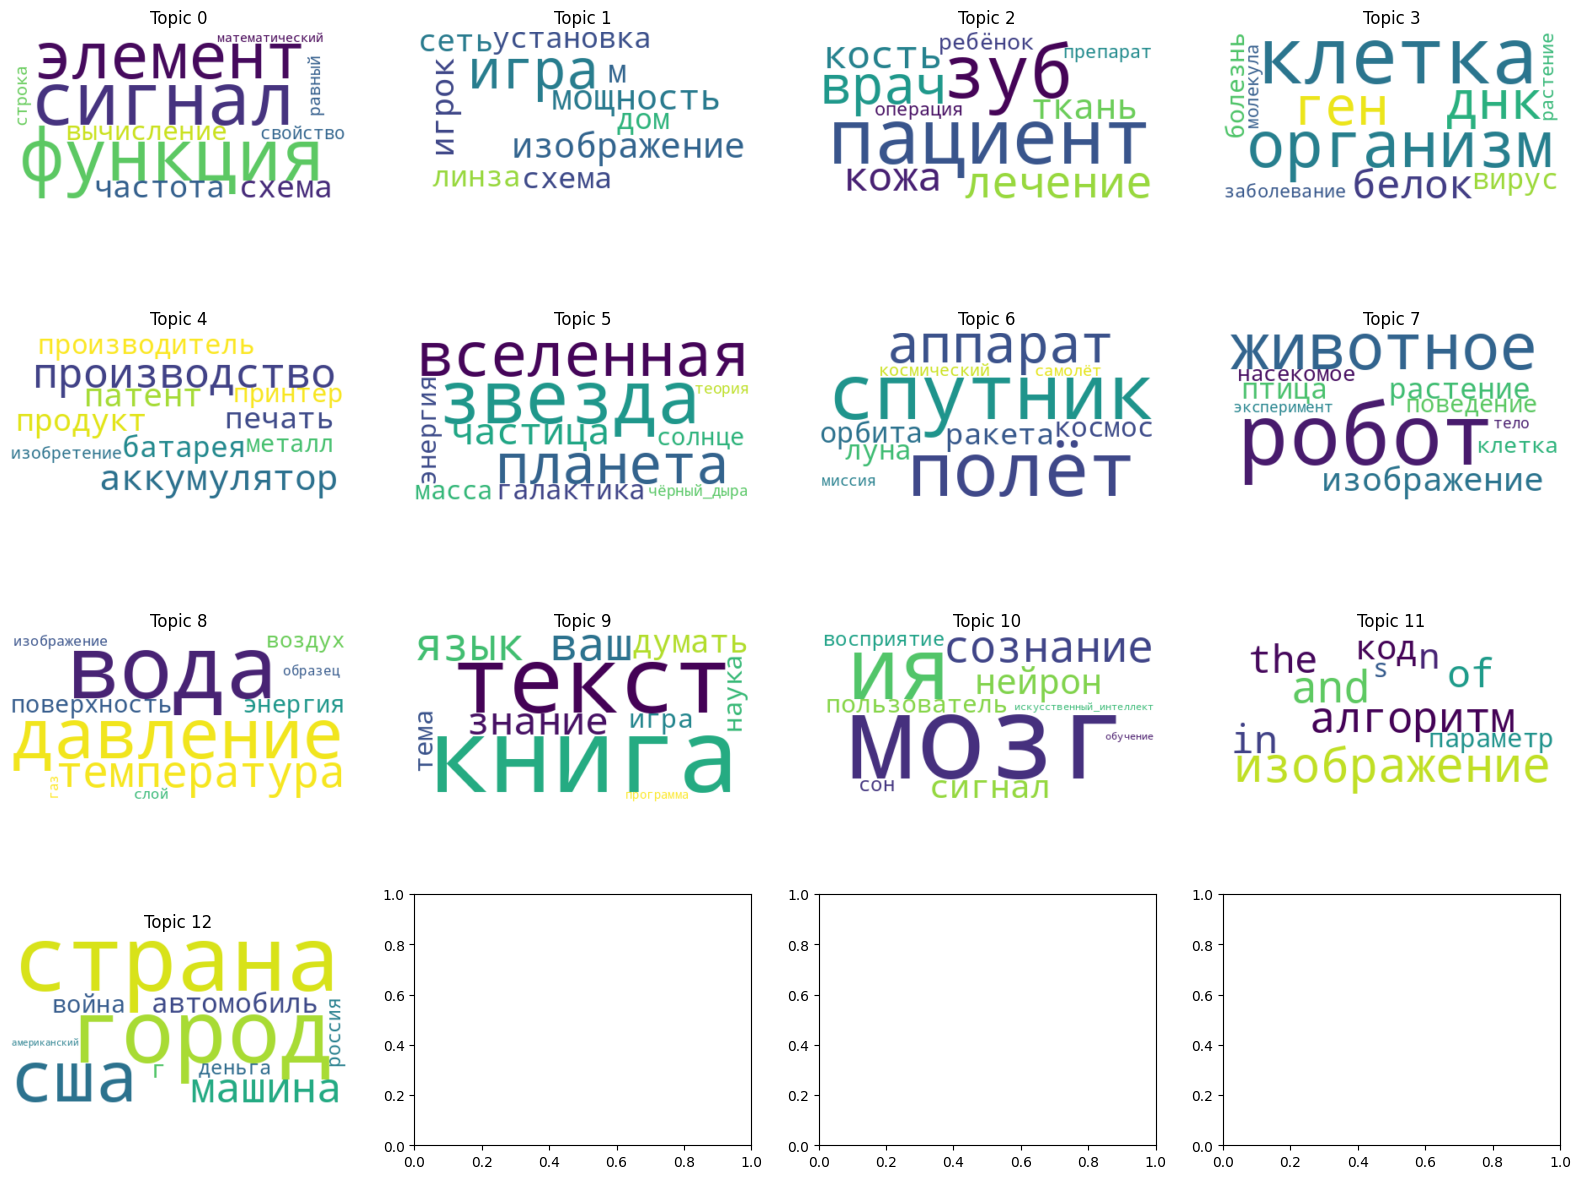

In [39]:
word_cloud = WordCloud(background_color='white')
fig, axes = plt.subplots(4, 4, figsize=(20,15))

for i, ax in enumerate(axes.flatten()[: num_topics]):
    fig.add_subplot(ax)
    topic_words = dict(model.show_topic(i))
    word_cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(word_cloud, interpolation='bilinear')
    plt.gca().set_title(f'Topic {i}')
    plt.gca().axis('off')
plt.show()

# Поиск имен

In [40]:
np.argmax(topics[0]), topics[0]

(24,
 [(0, 0.00019793175),
  (1, 0.00019793151),
  (2, 0.00019793109),
  (3, 0.00019793195),
  (4, 0.5789095),
  (5, 0.00019793243),
  (6, 0.38407987),
  (7, 0.00019793255),
  (8, 0.00019793303),
  (9, 0.00019793307),
  (10, 0.00019793247),
  (11, 0.035031293),
  (12, 0.00019793297)])

In [41]:
def get_topic_num(topic):
    idx = 0
    for value in topic:
        if topic[idx][1] < value[1]:
            idx = value[0]
    return idx

In [42]:
get_topic_num(topics[0])

4

In [43]:
df1 = pd.read_csv('.tmp/habr_dataset.csv')

In [44]:
df1.columns, df1.shape, len(topics), sum(df1.text.isnull())

(Index(['url', 'title', 'theme', 'tags', 'read_time', 'number_of_views', 'date',
        'amount_of_imgs', 'comments', 'bookmark', 'votes', 'text'],
       dtype='object'),
 (4338, 12),
 4337,
 0)

In [45]:
np.setdiff1d(np.array(df1['url'].to_list()),np.array( df['url'].to_list()))

array(['https://habr.com/ru/articles/572122/'], dtype='<U69')

In [46]:
idx = 0

def set_topic(row):
    global idx
    row['topic'] = get_topic_num(topics[idx])
    idx+=1
    return row

df2 = df.apply(set_topic, axis=1)

In [47]:
# df2 = df2.set_index('url')
# df1 = df1.set_index('url')
merged = pd.merge(df2, df1, on='url', how='left')

In [48]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4337 non-null   int64 
 1   url                4337 non-null   object
 2   title_x            4337 non-null   object
 3   theme_x            4337 non-null   object
 4   tags_x             4337 non-null   object
 5   read_time_x        4337 non-null   int64 
 6   number_of_views_x  4337 non-null   int64 
 7   date_x             4337 non-null   object
 8   amount_of_imgs_x   4337 non-null   int64 
 9   comments_x         4337 non-null   int64 
 10  bookmark_x         4337 non-null   int64 
 11  votes_x            4337 non-null   int64 
 12  text_x             4337 non-null   object
 13  topic              4337 non-null   int64 
 14  title_y            4337 non-null   object
 15  theme_y            4337 non-null   object
 16  tags_y             4337 non-null   object


In [49]:
merged[['tags_x', 'tags_y', 'topic', 'text_y']]

,tags_x,tags_y,topic,text_y
0,"['Научно-популярное', 'Физика']","['Научно-популярное', 'Физика']",4,"Производство бриллиантов стало дешевле, чем ко..."
1,"['Научно-популярное', 'Астрономия']","['Научно-популярное', 'Астрономия']",5,"В 1924 году радиоприёмник, созданный для полей..."
2,"['Блог компании Мон Тирэй', 'Научно-популярное...","['Блог компании Мон Тирэй', 'Научно-популярное...",5,Исследования российских учёных подтвердили сущ...
3,"['Блог компании Timeweb Cloud', 'Читальный зал...","['Блог компании Timeweb Cloud', 'Читальный зал...",9,Создатель.Точнее всего описывает Денниса Ритчи...
4,"['Научно-популярное', 'Мозг', 'Здоровье']","['Научно-популярное', 'Мозг', 'Здоровье']",3,Поиски лекарства от болезни Альцгеймера станов...
...,...,...,...,...
4332,"['Блог компании Selectel', 'Информационная без...","['Блог компании Selectel', 'Информационная без...",9,Источник\n\n«Интернет вещей» — это не только р...
4333,"['Блог компании ua-hosting.company', 'Научно-п...","['Блог компании ua-hosting.company', 'Научно-п...",8,Мы воспринимаем окружающий мир посредством наб...
4334,"['Научно-популярное', 'Астрономия']","['Научно-популярное', 'Астрономия']",5,Альфа Южной рыбы\n\n\nУвидеть Фомальгаут в Мос...
4335,"['Научно-популярное', 'Биология']","['Научно-популярное', 'Биология']",7,"Минуточку внимания:Как-то так получается, что ..."


In [50]:
topic_text = ['\n'.join(merged[merged['topic']==i].text_y) for i in range(20)]
len(topic_text), len(topic_text[0])

(20, 3991699)

In [51]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [52]:
for i in range(num_topics):
    print(f'Topic {i}')
    doc = Doc(topic_text[i])
    doc.segment(segmenter)
    # doc.tag_morph(morph_tagger)
    # doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)

    for span in doc.spans:
        span.normalize(morph_vocab)
    # print(doc.spans[:10])
    
    persons = set([i.text for i in doc.spans if i.type == 'PER'])
    locations = set([i.text for i in doc.spans if i.type == 'LOC'])
    
    print('Persons:', list(persons)[:100], end='\n\n')
    print('Locations:', list(locations)[:100])

    print('---'*25, '\n'*3)

Topic 0
Persons: ['Гомеостатическая Вселенная', 'НьютонаУже', 'Стюарт', 'Шрёдингера', 'Софи Жермен', 'Рубика', 'Сергеем Курдюмовым', 'Гениальность', 'Чёрчем', 'Сережкина Л.Б.', 'Михаэля Местлина', 'Жан Бурген', 'Джулиуса Лилиенфельда', 'Иванов', 'полезностиТеперь', 'Рамануджан', 'Рунге', 'Антикитерского', 'Арчибальд Непер', 'Л.Н. Толстого', 'Лазебник', 'В. И. Арнольд Получено', 'Джон Непер', 'Ричардсона', 'Кортевега-де Фриза', 'Гью', 'Борисом Чириковым', 'Анатолий Карацуба', 'Хаоса', 'Боб Моуг', 'Фибоначчи', 'Немета', 'Докладчика', 'Харви', 'Е.А. Донченко', 'Эндрю Макгрегор', 'Хосе Рамиль Альварес', 'Яглом', 'Эфириум', 'Мостона', 'Экселигмос', 'Уолтером Гордоном', 'Ричард Уэсли Хэмминг', 'Диоды Шоттки', 'Лены Сёдерберг', 'Однера', 'Христиан Гюйгенс', 'Коллинз', 'Роберт Шоу', 'де Фризом', 'Рикардс', 'Сильвестра Лакруа', 'Хироаки Китано', 'Гёте', 'Троичный', 'Браво', 'Фаму', 'бейсболаФутбол', 'Молдовян А.А.', 'Джеймс Клерк Максвелл', 'А. Э. Петросян', 'Отто', 'Манселла', 'Норберту Уайлдб